# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import random
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

#Set seed value so data is reproducible across runs
random.seed(42)

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [79]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 598


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city and change units to imperial
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=imperial"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt'] # in unix format
        
        # city_lat, city, city_lng, city_max_temp, city_humidity, city_clouds, city_wind, city_country, city_date
        
     

        # Append the City information into city_data lists
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | waitangi
Processing Record 2 of Set 1 | grytviken
Processing Record 3 of Set 1 | kudahuvadhoo
Processing Record 4 of Set 1 | hermanus
Processing Record 5 of Set 1 | rio san juan
Processing Record 6 of Set 1 | west island
Processing Record 7 of Set 1 | kowon-up
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | olonkinbyen
Processing Record 10 of Set 1 | port mathurin
Processing Record 11 of Set 1 | awjilah
Processing Record 12 of Set 1 | zhangye
Processing Record 13 of Set 1 | ilhabela
Processing Record 14 of Set 1 | port-aux-francais
Processing Record 15 of Set 1 | iskateley
Processing Record 16 of Set 1 | leava
Processing Record 17 of Set 1 | margaret river
Processing Record 18 of Set 1 | wailua homesteads
Processing Record 19 of Set 1 | lebu
Processing Record 20 of Set 1 | znamenskoye
Processing Record 21 of Set 1 | st. john's
Processing Record 22 of Set 1 | lorengau
Process

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)


# Show Record Count
city_data_df.count()

City          564
Lat           564
Lng           564
Max Temp      564
Humidity      564
Cloudiness    564
Wind Speed    564
Country       564
Date          564
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,waitangi,-43.9535,-176.5597,55.81,93,100,3.00,NZ,1682286212
1,grytviken,-54.2811,-36.5092,38.34,96,100,11.63,GS,1682286212
2,kudahuvadhoo,2.6708,72.8944,84.20,70,89,6.35,MV,1682286212
3,hermanus,-34.4187,19.2345,64.80,91,100,8.75,ZA,1682286213
4,rio san juan,19.6439,-70.0763,77.74,68,9,9.51,DO,1682286213


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [6]:
# Read saved data so I don't have to run the API calls every time
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,55.81,93,100,3.00,NZ,1682286212
1,grytviken,-54.2811,-36.5092,38.34,96,100,11.63,GS,1682286212
2,kudahuvadhoo,2.6708,72.8944,84.20,70,89,6.35,MV,1682286212
3,hermanus,-34.4187,19.2345,64.80,91,100,8.75,ZA,1682286213
4,rio san juan,19.6439,-70.0763,77.74,68,9,9.51,DO,1682286213


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

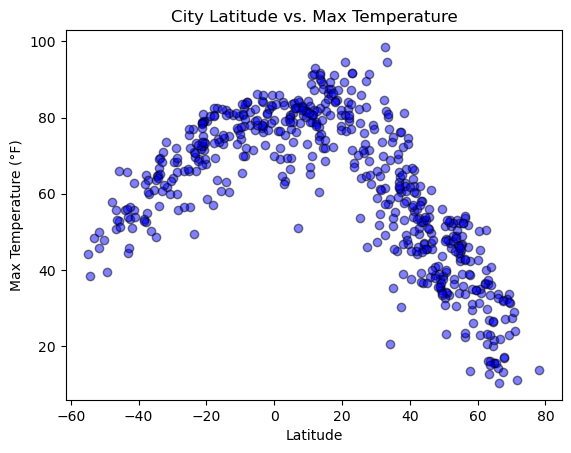

In [7]:
# Build scatter plot for latitude vs. temperature
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Max Temp"]

plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black", alpha = 0.5)


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°F)")
plt.title("City Latitude vs. Max Temperature")

# Save the figure
plt.savefig("output_data/City Lat vs Max Temp.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

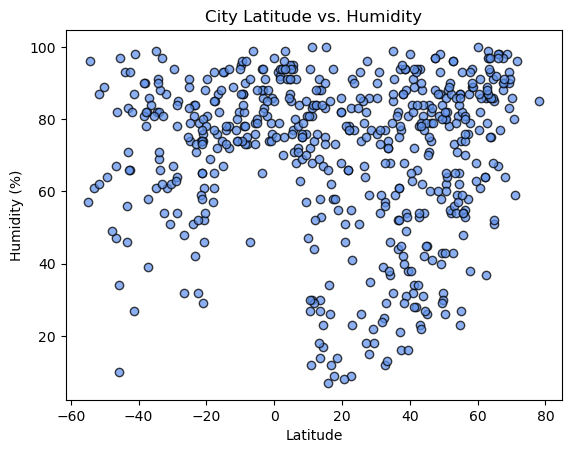

In [8]:
# Build the scatter plots for latitude vs. humidity
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Humidity"]

plt.scatter(x_axis, y_axis, marker="o", facecolors="cornflowerblue", edgecolors="black", alpha = 0.75)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity")

# Save the figure
plt.savefig("output_data/City Lat vs Humidity.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

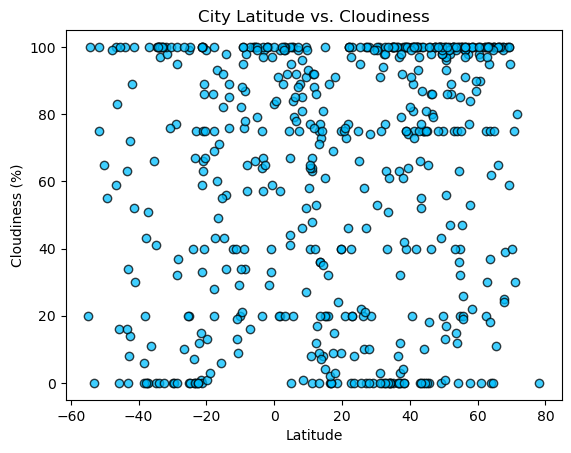

In [9]:
# Build the scatter plots for latitude vs. cloudiness
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Cloudiness"]

plt.scatter(x_axis, y_axis, marker="o", facecolors="deepskyblue", edgecolors="black", alpha = 0.75)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness")

# Save the figure
plt.savefig("output_data/City Lat vs Cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

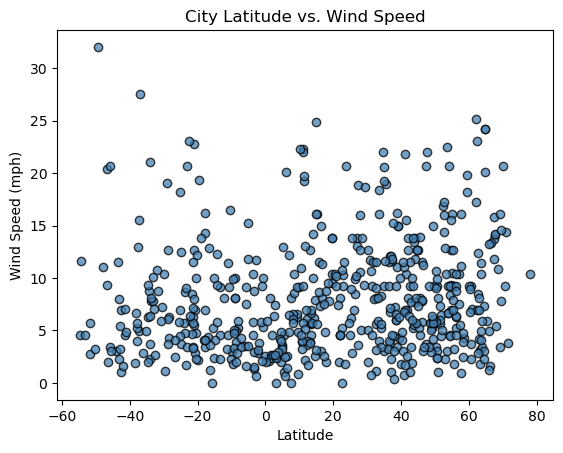

In [10]:
# Build the scatter plots for latitude vs. wind speed
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Wind Speed"]

plt.scatter(x_axis, y_axis, marker="o", facecolors="steelblue", edgecolors="black", alpha = 0.75)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed")

# Save the figure
plt.savefig("output_data/City Lat vs Wind Speed.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [57]:
# Define a function to create Linear Regression plots

def my_linregress(x_values, y_values, text_coordinates, text, y_title, plot_title):
    
    # Run regression on hemisphere weather data
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) + "\n r^2 = " + str(round(rvalue,3))
    
    # plot regression line
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation and add its coordinates
    plt.annotate(line_eq, xy= text_coordinates, fontsize = text, color="red")
    
    # Add labels and title to plot
    plt.xlabel('Latitude')
    plt.ylabel(y_title)
    plt.title(plot_title)


In [58]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,kudahuvadhoo,2.6708,72.8944,84.20,70,89,6.35,MV,1682286212
4,rio san juan,19.6439,-70.0763,77.74,68,9,9.51,DO,1682286213
6,kowon-up,39.4381,127.2431,46.92,81,100,4.29,KP,1682286213
8,olonkinbyen,70.9221,-8.7187,24.03,59,30,14.41,SJ,1682286214
10,awjilah,29.1081,21.2869,78.13,22,0,9.31,LY,1682286214


In [59]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,55.81,93,100,3.00,NZ,1682286212
1,grytviken,-54.2811,-36.5092,38.34,96,100,11.63,GS,1682286212
3,hermanus,-34.4187,19.2345,64.80,91,100,8.75,ZA,1682286213
5,west island,-12.1568,96.8225,80.58,89,40,8.05,CC,1682286213
7,ushuaia,-54.8000,-68.3000,44.26,57,20,4.61,AR,1682286082


###  Temperature vs. Latitude Linear Regression Plot

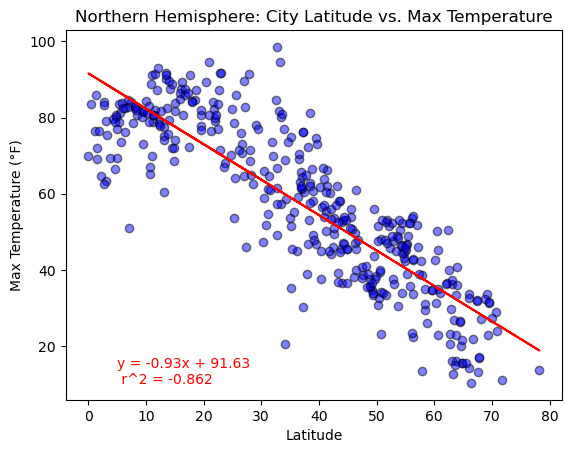

In [60]:
# Define axis for northern hemisphere
x_axis = northern_hemi_df["Lat"]
y_axis = northern_hemi_df["Max Temp"]

plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black", alpha = 0.5)

# graph labels
y_title = "Max Temperature (°F)"
plot_title = "Northern Hemisphere: City Latitude vs. Max Temperature"

# linear regression & annotation inputs
x_values = x_axis
y_values = y_axis
text_coordinates = (5,10)
text = 10

my_linregress(x_values, y_values, text_coordinates, text, y_title, plot_title )

# Save the figure and plot
plt.savefig("output_data/Northern Hemisphere - City Latitude vs. Max Temperature.png")
plt.show()

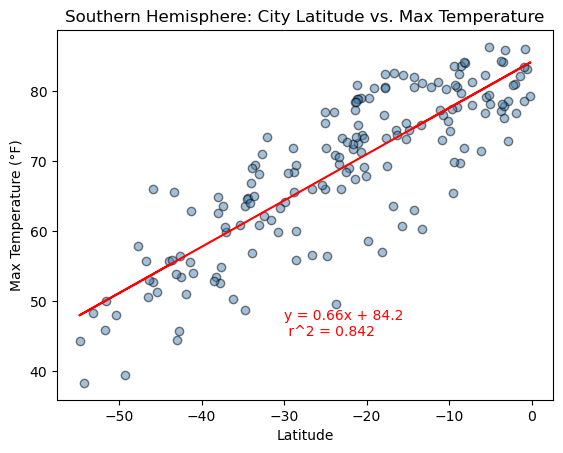

In [61]:
# Linear regression on Southern Hemisphere
x_axis = southern_hemi_df["Lat"]
y_axis = southern_hemi_df["Max Temp"]

plt.scatter(x_axis, y_axis, marker="o", facecolors="steelblue", edgecolors="black", alpha = 0.5)

# graph labels
y_title = "Max Temperature (°F)"
plot_title = "Southern Hemisphere: City Latitude vs. Max Temperature"

# linear regression & annotation inputs
x_values = x_axis
y_values = y_axis
text_coordinates = (-30,45)
text = 10

my_linregress(x_values, y_values, text_coordinates, text, y_title, plot_title )

# Save the figure and plot
plt.savefig("output_data/Southern Hemisphere - City Latitude vs. Max Temperature.png")
plt.show()


**Discussion about the linear relationship:** 

Both plots have a consistent linear relationship with Max Temperature and their degree of latitude. This makes sense because cities closer the Equator at 0 degrees latitude are the warmest, and temperatures decrease the further away they are from the Equator. Both have a faily high R-value of -0.86 & 0.84 showing a strong negative and postive correlation, respectively for the Norhtern and Souther hemispheres.



### Humidity vs. Latitude Linear Regression Plot

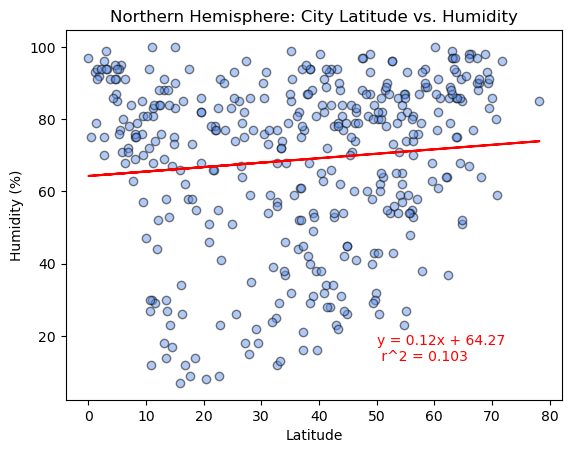

In [63]:
# Northern Hemisphere
x_axis = northern_hemi_df["Lat"]
y_axis = northern_hemi_df["Humidity"]

plt.scatter(x_axis, y_axis, marker="o", facecolors="cornflowerblue", edgecolors="black", alpha = 0.5)

# graph labels
y_title = "Humidity (%)"
plot_title = "Northern Hemisphere: City Latitude vs. Humidity"

# linear regression & annotation inputs
x_values = x_axis
y_values = y_axis
text_coordinates = (50,13)
text = 10

my_linregress(x_values, y_values, text_coordinates, text, y_title, plot_title )

# Save the figure and plot
plt.savefig("output_data/Northern Hemisphere - City Latitude vs. Humidity.png")
plt.show()

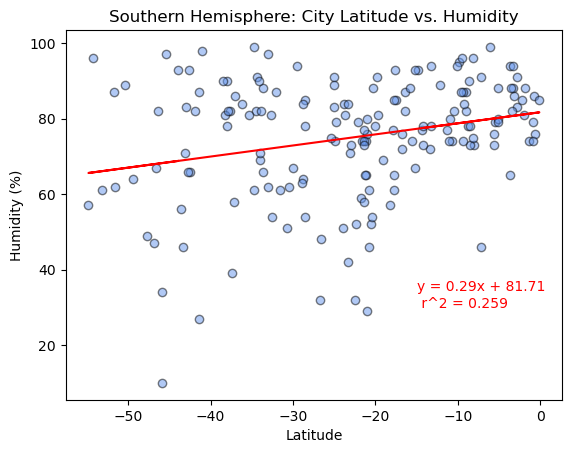

In [64]:
# Southern Hemisphere
x_axis = southern_hemi_df["Lat"]
y_axis = southern_hemi_df["Humidity"]

plt.scatter(x_axis, y_axis, marker="o", facecolors="cornflowerblue", edgecolors="black", alpha = 0.5)

# graph labels
y_title = "Humidity (%)"
plot_title = "Southern Hemisphere: City Latitude vs. Humidity"

# linear regression & annotation inputs
x_values = x_axis
y_values = y_axis
text_coordinates = (-15,30)
text = 10

my_linregress(x_values, y_values, text_coordinates, text, y_title, plot_title )

# Save the figure and plot
plt.savefig("output_data/Southern Hemisphere - City Latitude vs. Humidity.png")
plt.show()

**Discussion about the linear relationship:** 

Both Northern and Southern hemispheres show a fairly weak correlation to humidity and latitude based on this data sample. There is likely a greatly correlation with proximity to oceans or large bodies of water which will vary regardless of the city's latitude. 

### Cloudiness vs. Latitude Linear Regression Plot

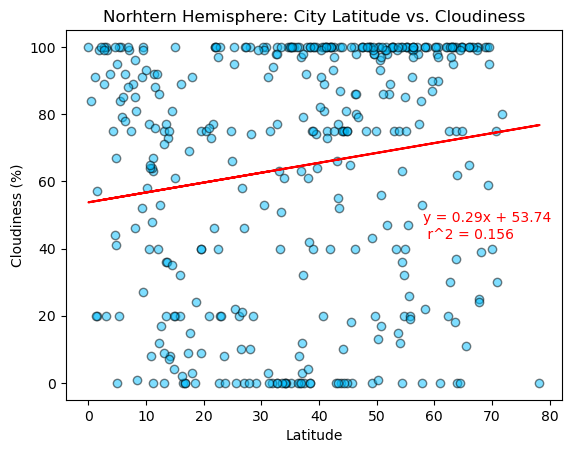

In [67]:
# Northern Hemisphere
x_axis = northern_hemi_df["Lat"]
y_axis = northern_hemi_df["Cloudiness"]

plt.scatter(x_axis, y_axis, marker="o", facecolors="deepskyblue", edgecolors="black", alpha = 0.5)

# graph labels
y_title = "Cloudiness (%)"
plot_title = "Norhtern Hemisphere: City Latitude vs. Cloudiness"

# linear regression & annotation inputs
x_values = x_axis
y_values = y_axis
text_coordinates = (58,43)
text = 10

my_linregress(x_values, y_values, text_coordinates, text, y_title, plot_title )

# Save the figure and plot
plt.savefig("output_data/Norhtern Hemisphere - City Latitude vs. Cloudiness.png")
plt.show()

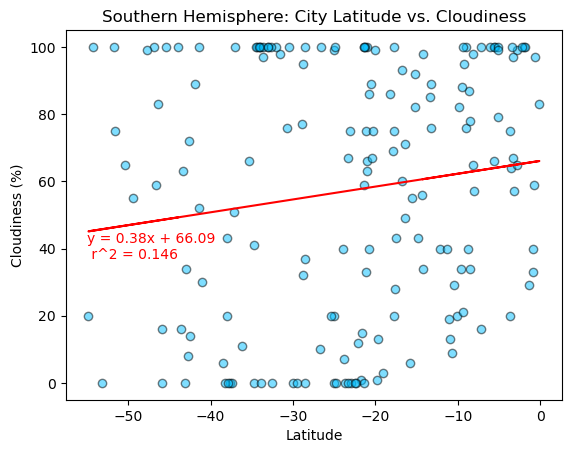

In [69]:
# Southern Hemisphere
x_axis = southern_hemi_df["Lat"]
y_axis = southern_hemi_df["Cloudiness"]

plt.scatter(x_axis, y_axis, marker="o", facecolors="deepskyblue", edgecolors="black", alpha = 0.5)

# graph labels
y_title = "Cloudiness (%)"
plot_title = "Southern Hemisphere: City Latitude vs. Cloudiness"

# linear regression & annotation inputs
x_values = x_axis
y_values = y_axis
text_coordinates = (-55,37)
text = 10

my_linregress(x_values, y_values, text_coordinates, text, y_title, plot_title )

# Save the figure and plot
plt.savefig("output_data/Southern Hemisphere - City Latitude vs. Cloudiness.png")
plt.show()

**Discussion about the linear relationship:** 

The correlation between cloudiness and latitude position is also fairly weak based on this data sample. The slope of the linear regression suggests that cities in the Northern hemisphere are more cloudy the further away from the Equator (0 latitude). While the linear regression for the Southern hemisphere suggests that cities decrease in cloudiness the further they get from the Equator (0 latitude). This could be worth running multiple samples to see if the relationship remained constant.

### Wind Speed vs. Latitude Linear Regression Plot

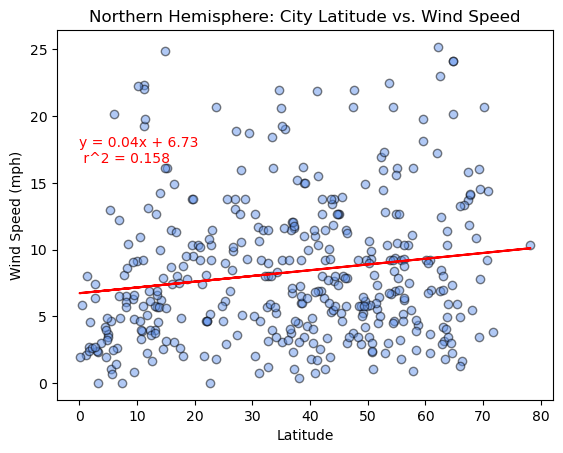

In [74]:
# Northern Hemisphere
x_axis = northern_hemi_df["Lat"]
y_axis = northern_hemi_df["Wind Speed"]

plt.scatter(x_axis, y_axis, marker="o", facecolors="cornflowerblue", edgecolors="black", alpha = 0.5)

# graph labels
y_title = "Wind Speed (mph)"
plot_title = "Northern Hemisphere: City Latitude vs. Wind Speed"

# linear regression & annotation inputs
x_values = x_axis
y_values = y_axis
text_coordinates = (0,16.5)
text = 10

my_linregress(x_values, y_values, text_coordinates, text, y_title, plot_title )

# Save the figure and plot
plt.savefig("output_data/Northern Hemisphere - City Latitude vs. Wind Speed.png")
plt.show()

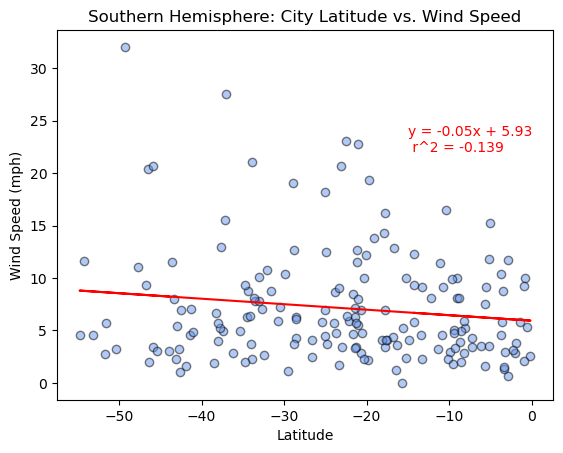

In [75]:
# Southern Hemisphere
x_axis = southern_hemi_df["Lat"]
y_axis = southern_hemi_df["Wind Speed"]

plt.scatter(x_axis, y_axis, marker="o", facecolors="cornflowerblue", edgecolors="black", alpha = 0.5)

# graph labels
y_title = "Wind Speed (mph)"
plot_title = "Southern Hemisphere: City Latitude vs. Wind Speed"

# linear regression & annotation inputs
x_values = x_axis
y_values = y_axis
text_coordinates = (-15,22)
text = 10

my_linregress(x_values, y_values, text_coordinates, text, y_title, plot_title )

# Save the figure and plot
plt.savefig("output_data/Southern Hemisphere - City Latitude vs. Wind Speed.png")
plt.show()

**Discussion about the linear relationship:** 

The linear fits for both data samples are pretty weak, but overall slope of the linear regression suggests that wind speeds increase as cities get further away from the Equator in the Norther and Southern hemispheres.